# Prophet TS Analysis

Code Adapted from https://facebook.github.io/prophet/docs/quick_start.html#python-api

## Libraries and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

import warnings
warnings.filterwarnings('ignore')

In [2]:
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [3]:
# import original data
df = pd.read_csv('../data/sample/AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])

# alternative data to try. NOTE: Comment Out: ts_df['Month'] = pd.to_datetime(ts_df['Month'])
# df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# convert to format for prophet
df.columns = ["ds", "y"]
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
# create and fit prophet model
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
504,1961-11-27,498.426807,467.015661,528.436777
505,1961-11-28,496.900948,467.356994,525.841745
506,1961-11-29,494.741508,467.297957,524.485817
507,1961-11-30,491.992819,462.950711,520.371289
508,1961-12-01,488.714455,459.098906,518.087693


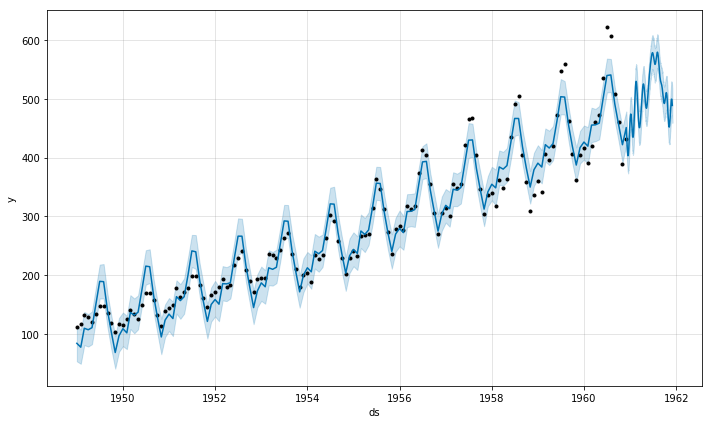

In [7]:
fig1 = m.plot(forecast)


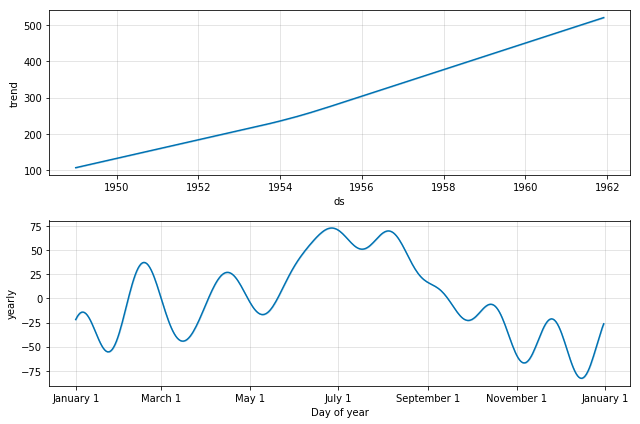

In [8]:
fig2 = m.plot_components(forecast)
